In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset ###

In [2]:
dataset=pd.read_csv(r"D:\Simplilearn\DS with Python\Walmart Project\Walmart_Store_sales.csv")

In [3]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
dataset.shape

(6435, 8)

### Checking for any null values in the columns ###

In [5]:
dataset.isnull().any()

Store           False
Date            False
Weekly_Sales    False
Holiday_Flag    False
Temperature     False
Fuel_Price      False
CPI             False
Unemployment    False
dtype: bool

In [6]:
dataset.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [7]:
dataset['Date']=pd.to_datetime(dataset['Date'])

### A Store that has maximum sales ###

In [8]:
dataset['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [9]:
dataset[dataset['Weekly_Sales']==max(dataset['Weekly_Sales'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724


### Calculating standard dev for each entry ###

In [10]:
import math

In [11]:
mean_wsales=dataset['Weekly_Sales'].mean()
print(mean_wsales)

1046964.8775617732


In [12]:
std_dev=[]
for price in dataset['Weekly_Sales']:
    var=(price-mean_wsales)**2/len(dataset['Weekly_Sales'])-1
    std=math.sqrt(var)
    std_dev.append(std)
    

In [13]:
std_col=pd.DataFrame(std_dev,columns=["StandardDev"])

In [14]:
X=dataset

In [15]:
X=pd.concat([X,std_col],axis=1)

In [16]:
X

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,StandardDev
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,7438.762580
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,7417.153337
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,7043.308297
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4522.185304
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,6330.735449
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,4161.024187
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,3908.200551
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,3895.618782
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,4099.297987


### Store with max standard deviation ###

In [17]:
X[X['StandardDev']==max(X['StandardDev'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,StandardDev
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724,34552.169869


### Coefficient of mean to standard dev ###

In [18]:
coeff_var=(max(X['StandardDev'])/mean_wsales)*100

In [19]:
coeff_var

3.3002224439369683

## FYQ3, 2012 Study ##

In [20]:
Q3=[10,11,12]
year=2012

In [21]:
df1=[]
for i in dataset['Date']:
    if i.year==year and i.month in Q3:
        df1.append(i)

In [22]:
Q3_data=dataset[dataset['Date'].isin(df1)]

In [23]:
Q3_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348
118,1,2012-11-05,1611096.05,0,73.77,3.688,221.725663,7.143
131,1,2012-10-08,1592409.97,0,85.05,3.494,221.958433,6.908
140,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573
...,...,...,...,...,...,...,...,...
6410,45,2012-11-05,770487.37,0,61.24,3.889,190.976417,8.567
6423,45,2012-10-08,733037.32,0,78.65,3.722,191.162613,8.684
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


Text(0, 0.5, 'Sales')

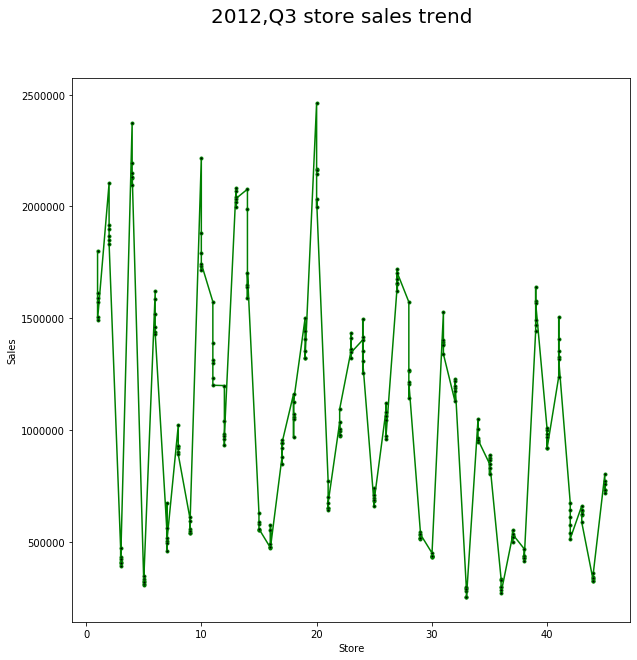

In [24]:
fig = plt.figure(figsize=(10,10))
plt.plot(Q3_data['Store'],Q3_data['Weekly_Sales'],color="g",marker="o",markerfacecolor="black",markersize=3)
fig.suptitle('2012,Q3 store sales trend', fontsize=20)
plt.xlabel("Store")
plt.ylabel("Sales")


In [25]:
Q3_data[Q3_data['Weekly_Sales']==max(Q3_data['Weekly_Sales'])]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2822,20,2012-10-02,2462978.28,1,33.47,3.64,213.118614,6.961


### As seen from the above graph, store 20 has maximum sales in Q3,2012 ###

In [26]:
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [27]:
non_holiday=dataset[dataset['Holiday_Flag']==0]

In [28]:
holiday=dataset[dataset['Holiday_Flag']==1]

In [29]:
nh_mean=non_holiday.Weekly_Sales.mean()

In [30]:
df=holiday[holiday['Weekly_Sales']>nh_mean]

In [31]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724


### Holidays that have higher sales than mean sales in non-holiday season ###

In [32]:
df['Date']=df['Date'].dt.strftime("%b %d %Y")

C:\Users\Ravi Teja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,Dec 02 2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,Oct 09 2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,Nov 26 2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,Dec 31 2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,Nov 02 2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,Dec 30 2011,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,Oct 02 2012,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,Jul 09 2012,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,Nov 26 2010,1182500.16,1,46.15,3.039,182.783277,8.724


In [34]:
df.groupby("Date").size()

Date
Dec 02 2010    21
Dec 30 2011    19
Dec 31 2010    16
Jul 09 2012    22
Nov 02 2011    20
Nov 25 2011    31
Nov 26 2010    30
Oct 02 2012    22
Oct 09 2010    19
Sep 09 2011    20
dtype: int64

#### As seen from the above output, there were  31 sales Nov 25,2011 which were consisting of sales greater than mean sales of non holiday season. So we can conclude that "Thanks giving" contribued to high sales ####

## Max Monthly sales calculation ##

In [35]:
df_monthly=dataset

In [36]:
df_monthly

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [37]:
df_monthly['Month']=df_monthly['Date'].dt.month

In [38]:
df_monthly

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10


In [39]:
df_monthly.groupby("Month")['Weekly_Sales'].max()

Month
1     2179360.94
2     2495630.51
3     2416051.17
4     2363601.47
5     2623469.95
6     2565259.92
7     2370116.52
8     2283540.30
9     2546123.78
10    2752122.08
11    3004702.33
12    3818686.45
Name: Weekly_Sales, dtype: float64

### As seen from the above output, the sales were high during December month ###

In [40]:
new_df=pd.DataFrame(df_monthly.groupby("Month")['Weekly_Sales'].max())

In [41]:
new_df=new_df.reset_index()

Text(0, 0.5, 'Sales')

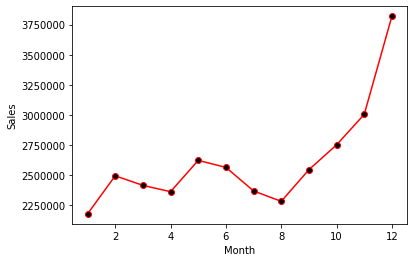

In [42]:
plt.plot(new_df['Month'],new_df['Weekly_Sales'],color="red",marker="o",markerfacecolor="black")
plt.xlabel("Month")
plt.ylabel("Sales")

### Max year sales calculation ###

In [43]:
df_year=dataset

In [44]:
df_year['Yearly']=df_year['Date'].dt.year

In [45]:
df_year

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Yearly
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [46]:
df_year.groupby("Yearly")['Weekly_Sales'].max()

Yearly
2010    3818686.45
2011    3676388.98
2012    2565259.92
Name: Weekly_Sales, dtype: float64

In [47]:
new_df2=pd.DataFrame(df_year.groupby("Yearly")['Weekly_Sales'].max())

In [48]:
new_df2=new_df2.reset_index()

In [49]:
new_df2

,Yearly,Weekly_Sales
0,2010,3818686.45
1,2011,3676388.98
2,2012,2565259.92


In [50]:
import seaborn as sns

Text(0.5, 1.0, 'Year wise max sales')

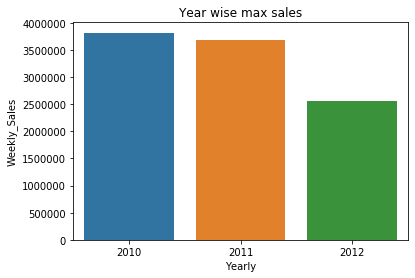

In [51]:
sns.barplot(data=new_df2,x="Yearly",y="Weekly_Sales")
plt.title("Year wise max sales")

##### As seen from the above plot, the sales were high during the year 2010 #####

In [52]:
dataset['Day']=dataset['Date'].dt.strftime("%A")

In [53]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Yearly,Day
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,Monday


In [54]:
dataset.groupby(["Day"]).size()

Day
Friday       4320
Monday        495
Saturday      270
Sunday        405
Thursday      450
Tuesday       405
Wednesday      90
dtype: int64

#### As seen from the above summary, we notice that there were huge number of sales on Friday than other days ####

## Hypothesis testing if CPI , Unemployment and Fuel price have impact on sales ##

In [55]:
#Ho: There is no impact
#H1: There is impact
dataset.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
Month                    int64
Yearly                   int64
Day                     object
dtype: object

In [56]:
mydat=dataset

In [57]:
from scipy.stats import spearmanr

In [58]:
#Check for monotonic relationship between CPI and sales
coef, p = spearmanr(dataset['CPI'], dataset['Weekly_Sales'])

In [59]:
p


9.974859594060115e-06

In [60]:
#Check for monotonic relationship between Unemployment and sales
coef, p = spearmanr(dataset['Unemployment'], dataset['Weekly_Sales'])

In [61]:
p

5.562381891361678e-07

In [62]:
#Check for monotonic relationship between Fuel price and sales
coef, p = spearmanr(dataset['Fuel_Price'], dataset['Weekly_Sales'])

In [63]:
p

0.04103625630404875

In [64]:
coef, p = spearmanr(dataset['Holiday_Flag'], dataset['Weekly_Sales'])

In [65]:
p

0.025879811752895044

#### From all the above p values, as p<0.05 : We reject null hypothesis.

### Finding a model to predict sales ###

In [66]:
dataset['Week']=dataset['Date'].dt.week

In [67]:
dataset

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Yearly,Day,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,Sunday,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,Thursday,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,Monday,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,Friday,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,Thursday,19
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,Monday,50
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,Friday,42


In [68]:
encode_day=pd.get_dummies(dataset['Day'])

In [69]:
encode_day

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
6430,1,0,0,0,0,0,0
6431,0,0,0,0,1,0,0
6432,0,1,0,0,0,0,0
6433,1,0,0,0,0,0,0


In [70]:
dataset=pd.concat([dataset,encode_day],axis=1)

In [71]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Yearly,Day,Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,Sunday,17,0,0,0,1,0,0,0
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,Thursday,48,0,0,0,0,1,0,0
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday,7,1,0,0,0,0,0,0
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday,8,1,0,0,0,0,0,0
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,Monday,18,0,1,0,0,0,0,0


### Outlier analysis ###

In [72]:
z=dataset['Weekly_Sales'].describe()

In [73]:
q3=z["75%"]
q1=z["25%"]

In [74]:
iqr=q3-q1
print(q1)
print(iqr)

553350.105
866808.5549999999


In [75]:
outlier1=q1-(1.5*iqr)
outlier2=q3+(1.5*iqr)

In [76]:
print("Outlier range is {} to {}".format(outlier1,outlier2))

Outlier range is -746862.7275 to 2720371.4924999997


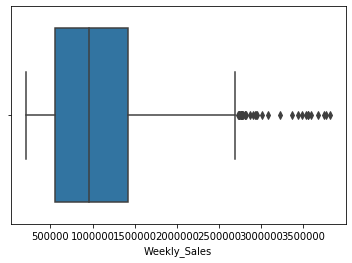

In [77]:
sns.boxplot(dataset['Weekly_Sales'])

In [78]:
dataset.Weekly_Sales=np.where(dataset.Weekly_Sales>outlier2,200000,dataset.Weekly_Sales)

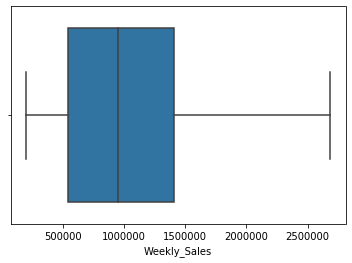

In [106]:
sns.boxplot(dataset['Weekly_Sales'])

In [79]:
y=dataset[['Weekly_Sales']].values

In [80]:
X=dataset.drop(['Weekly_Sales','Store','Date','Day','Temperature','CPI','Unemployment','Month'],axis=1)

In [107]:
X.head()

,Holiday_Flag,Fuel_Price,Yearly,Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,2.572,2010,17,0,0,0,1,0,0,0
1,1,2.548,2010,48,0,0,0,0,1,0,0
2,0,2.514,2010,7,1,0,0,0,0,0,0
3,0,2.561,2010,8,1,0,0,0,0,0,0
4,0,2.625,2010,18,0,1,0,0,0,0,0


In [110]:
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [155]:
model=RandomForestRegressor(n_estimators=100)

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [157]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
scaler_y=StandardScaler()

In [158]:
X_train[["Fuel_Price","Week","Yearly"]]=scaler_x.fit_transform(X_train[["Fuel_Price","Week","Yearly"]])
X_test=scaler_x.fit_transform(X_test)
y_train=scaler_y.fit_transform(y_train)

C:\Users\Ravi Teja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ravi Teja\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [159]:

model.fit(X_train,y_train)

C:\Users\Ravi Teja\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [160]:
#model.intercept_

In [161]:
pred=model.predict(X_test)

In [162]:
pred=scaler_y.inverse_transform(pred).flatten()


In [163]:
y_test[1:4]

array([[1304850.67],
       [1769296.25],
       [1077640.13]])

In [164]:
pred[1:4]

array([927196.90235881, 852293.54029603, 925738.95781766])

In [233]:
res=y_test-pred

In [234]:
res.mean()

3991.894572828474

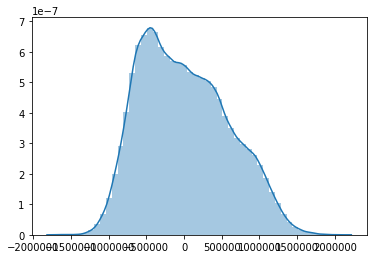

In [167]:
sns.distplot(res)

Text(0, 0.5, 'predicted')

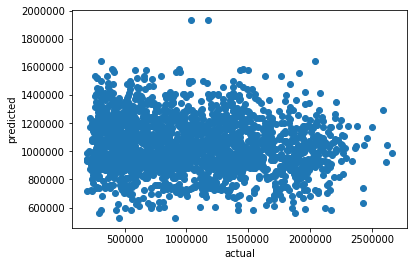

In [168]:
plt.scatter(y_test,pred)
plt.xlabel("actual")
plt.ylabel("predicted")

In [169]:
from sklearn.metrics import mean_squared_error,r2_score

In [170]:
mse=mean_squared_error(y_test,pred)

In [171]:
rmse=np.sqrt(mse)

In [172]:
print("The root mean square error is: {}".format(rmse))

The root mean square error is: 599403.8178384951


In [173]:
r2=r2_score(y_test,pred)

In [174]:
print("The r squared score is {}".format(r2))

The r squared score is -0.1935390870518503


In [175]:
accr=model.score(X_train,y_train)*100

In [176]:
print("The accuracy of model is {}".format(accr))

The accuracy of model is 23.598700864193432


### DECISION TREE REGRESSION ###

In [187]:
from sklearn.tree import DecisionTreeRegressor

In [210]:
model2=DecisionTreeRegressor(criterion='mse',max_depth=10)

In [211]:
model2.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [212]:
pred2=model2.predict(X_test)

In [213]:
pred2=scaler_y.inverse_transform(pred2).flatten()

In [214]:
pred2[1:4]

array([1001948.68625169, 1001948.68625169, 1154059.88717949])

In [215]:
res2=y_test-pred2

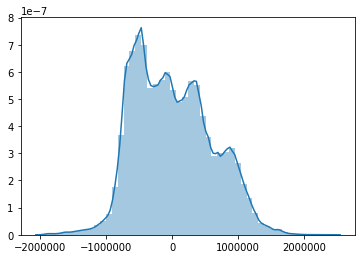

In [216]:
sns.distplot(res2)

In [217]:
model2.score(X_train,y_train)*100

8.11796600481236

Text(0, 0.5, 'predicted')

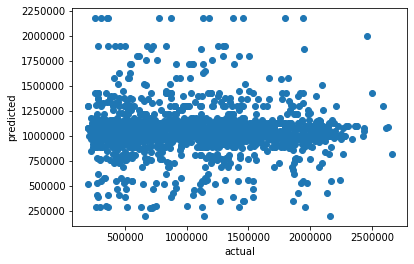

In [218]:
plt.scatter(y_test,pred2)
plt.xlabel("actual")
plt.ylabel("predicted")

In [219]:
from sklearn.neighbors import KNeighborsRegressor

In [220]:
model3=KNeighborsRegressor(n_neighbors=20)

In [222]:
model3.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                    weights='uniform')

In [223]:
pred3=model3.predict(X_test)

In [224]:
pred3=scaler_y.inverse_transform(pred3).flatten()

In [225]:
pred3[1:4]

array([1118798.1125,  927250.3335, 1145294.1775])

In [229]:
y_test.flatten()

array([1138800.32, 1304850.67, 1769296.25, ..., 1166479.51,  542016.18,
        633203.69])

In [232]:
res3=y_test-pred3

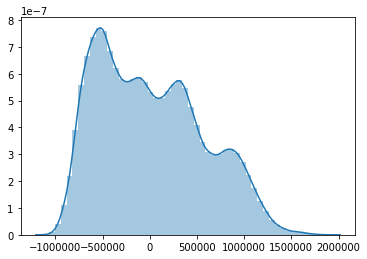

In [235]:
sns.distplot(res3)

In [237]:
model3.score(X_train,y_train)*100

3.532537835394467

Text(0, 0.5, 'predicted')

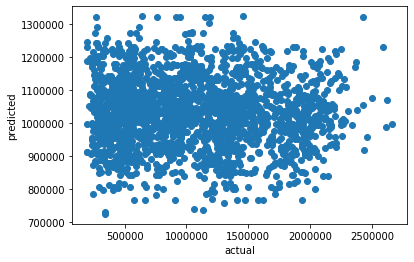

In [238]:
plt.scatter(y_test,pred3)
plt.xlabel("actual")
plt.ylabel("predicted")